                                 salary  to_messages  deferral_payments  \
ALLEN PHILLIP K                  201955         2902            2869717   
BADUM JAMES P                         0            0             178980   
BANNANTINE JAMES M                  477          566                  0   
BAXTER JOHN C                    267102            0            1295738   
BAY FRANKLIN R                   239671            0             260455   
BAZELIDES PHILIP J                80818            0             684694   
BECK SALLY W                     231330         7315                  0   
BELDEN TIMOTHY N                 213999         7991            2144013   
BELFER ROBERT                         0            0            -102500   
BERBERIAN DAVID                  216582            0                  0   
BERGSIEKER RICHARD P             187922          383                  0   
BHATNAGAR SANJAY                      0          523                  0   
BIBI PHILIPPE A          

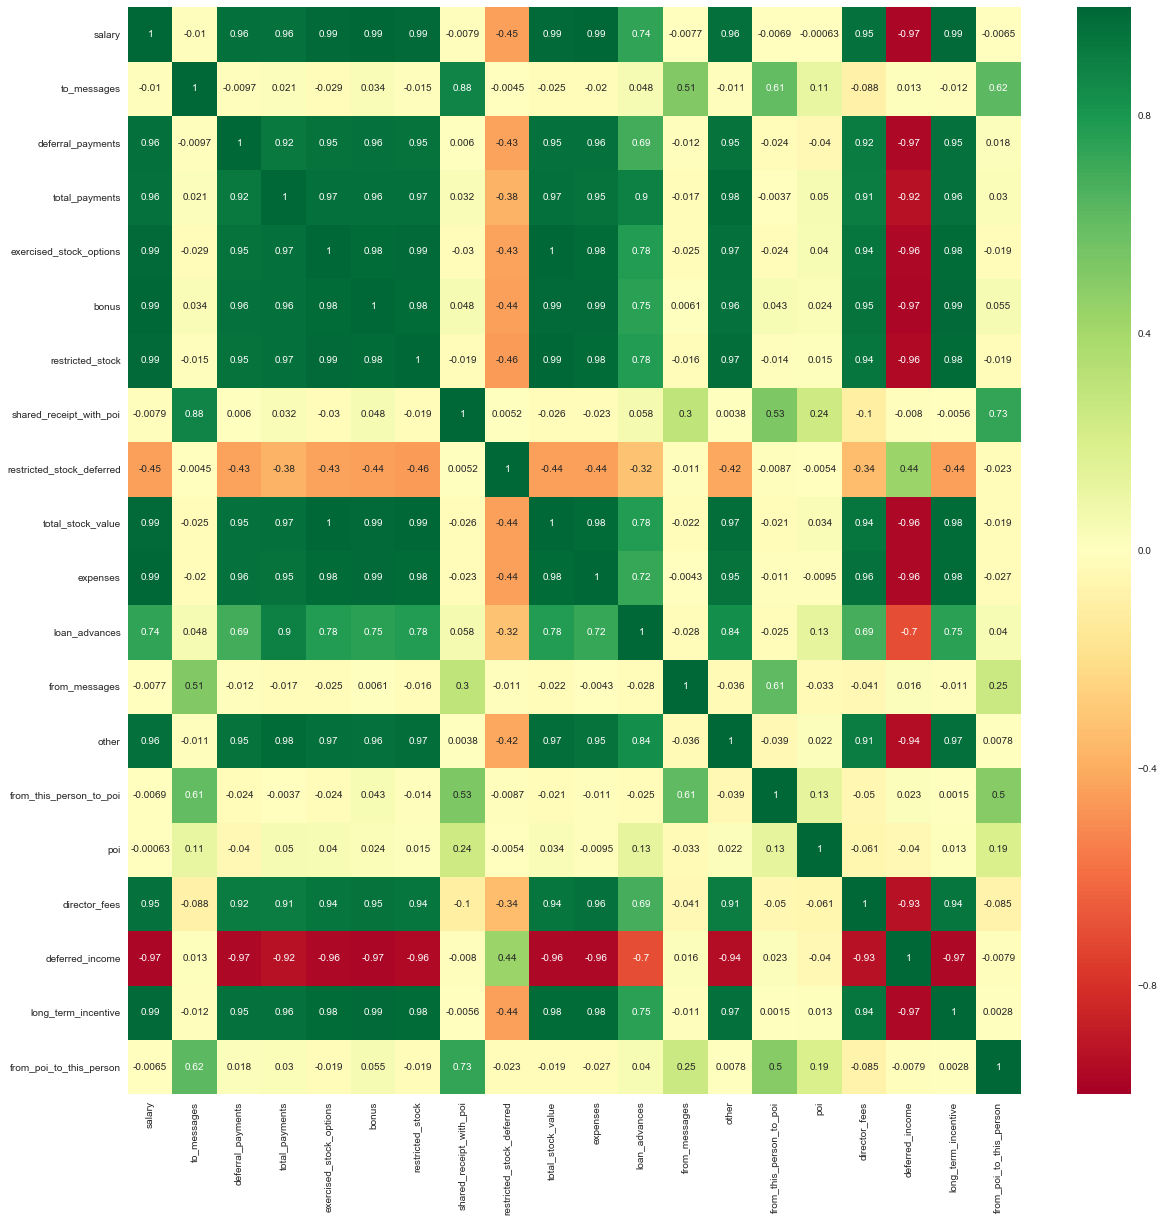

In [45]:
#Utiliser une méthode de réduction (voir Leçon 12)

#!/usr/bin/python

import sys
import pickle
from pprint import pprint as pp
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline




#sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data



### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".


features_list = [
    'poi',
    'salary',
    'to_messages',
    'deferral_payments',
    'total_payments',
    'exercised_stock_options',
    'bonus',
    'restricted_stock',
    'shared_receipt_with_poi',
    'restricted_stock_deferred',
    'total_stock_value',
    'expenses',
    'loan_advances',
    'from_messages',
    'other',
    'from_this_person_to_poi',
    'director_fees',
    'deferred_income',
    'long_term_incentive',
    #'email_address',
    'from_poi_to_this_person',
]






### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)



def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

for _, values in data_dict.items():
    for key, value in values.items():
        if isnan(value):
            values[key] = 0




#Correlation Matrix with Heatmap (from https://towardsdatascience.com/)
pd_data = pd.DataFrame.from_dict(data_dict, orient='index')
corrmat = pd_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(pd_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

pp(pd_data)





### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)




def arrayToList(arr):
    if type(arr) == type(np.array):
        return arrayToList(arr.tolist())
    else:
        return arr
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:16.0f}'.format}, linewidth=130)
print(arrayToList(data))




### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)